# Feb_22_01_52_16_m0.5_s0.35_nx192_nl36

name: Feb_22_01_52_16_m0.5_s0.35_nx192_nl36 \
black_hole_mass 0.5 \
black_hole_spin 0.35 \
compactification_length 1.0 \
evolve_time 150.0 (121) \
num_saved_times 150 (122) \
nx 192 \
nl 36 \
scd_order_start_time 8.807591456059475

## Setup and Definitions

### Imports

In [1]:
import ringdown_fits as rdf
import numpy as np
import qnm
import pandas as pd
import matplotlib.pyplot as plt

### Useful functions for fitting the data

In [2]:
def QNM_spectrum(l,m,n,mass,spin):
    """ It computes the RD frequencies and damping times in NR units.
    """  
    omegas_new=modes_spec[-2,l,m,n](spin)[0]
    w_m_a = (np.real(omegas_new))/mass
    tau_m_a=-1/(np.imag(omegas_new))*mass

    return (np.array([w_m_a]), np.array([tau_m_a]))

def QNM_spectrum_w(l,m,n,mass,spin):
    """ It computes the RD frequencies and damping times in NR units.
    """  
    omegas_new=modes_spec[-2,l,m,n](spin)[0]/mass

    return omegas_new

def QNM_spectrum_re_im(l,m,n,mass,spin):
    """ It computes the RD frequencies and damping times in NR units.
    """  
    omegas_new=modes_spec[-2,l,m,n](spin)[0]
    w_re = (np.real(omegas_new))/mass
    w_im = (np.imag(omegas_new))/mass

    return w_re+1j*w_im

def delta_omega(omega_fit, omega_target):
    
    r_fit = np.real(omega_fit)
    i_fit = np.imag(omega_fit)
    
    r_target = np.real(omega_target)
    i_target = np.imag(omega_target)
    
    return np.sqrt(((r_fit-r_target)/r_target)**2 + ((i_fit-i_target)/i_target)**2)

### Load qnm spectra

In [3]:
s, l, m = [(-2,-2,-2,-2),(2,4,4,2),(0,0,4,2)]
mode_list = [(s[i], l[i], m[i], n) for n in np.arange(0,8) for i in range(len(m))]
modes_spec = { ind : qnm.modes_cache(*ind) for ind in mode_list }

### Useful functions for reading the data

In [39]:
def extract_mean_asymp(file_name:str) -> (np.array, np.array):

	times, vals=  read_times_vals_csv_2d(file_name)

	nx, ny= vals[0].shape
	ptx= nx-1

	asymptotic_vals= [np.mean(step[ptx]) for step in vals]

	return (np.array(times), np.array(asymptotic_vals))

def extract_mean_horizon(file_name:str) -> (np.array, np.array):

	times, vals=  read_times_vals_csv_2d(file_name)

	nx, ny= vals[0].shape
	ptx= 0

	asymptotic_vals= [np.mean(step[ptx]) for step in vals]

	return (np.array(times), np.array(asymptotic_vals))

def read_times_vals_csv_2d(name:str) -> (np.array,np.array):
    name= set_extension(name)
    times= []
    vals= []
    with open(name,'r') as f:
        for line in f:
            line= [v for v in line.split(',')]
            time= float(line[0])
            nx= int(line[1])
            ny= int(line[2])
            arr= np.zeros((nx,ny))
            for i in range(nx):
                for j in range(ny):
                    try:
                        arr[i][j]= float(line[3+ny*i+j])
                    except ValueError:
                        arr[i][j]= float(0)
            times.append(time)
            vals.append(arr)
    return times, np.array(vals)

def set_extension(name:str) -> str:
   if name.endswith('.csv'):
      return name
   else:
      return name+'.csv'

### Read the data and combine real and imaginary parts

In [40]:
psi4_lin_re = pd.read_csv('/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36/lin_f_m2_re.csv')
psi4_lin_im = pd.read_csv('/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36/lin_f_m2_im.csv')

### Null infinity

In [41]:
times, psi4_re =extract_mean_asymp('/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36/lin_f_m2_re.csv')
times, psi4_im =extract_mean_asymp('/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36/lin_f_m2_im.csv')

In [56]:
psi4_lin = psi4_re +1j *psi4_im

psi4_lin_ts = np.stack((times-20, psi4_lin)).T

### Horizon

In [42]:
times_h, psi4_re_h =extract_mean_horizon('/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36/lin_f_m2_re.csv')
times_h, psi4_im_h =extract_mean_horizon('/home/alex/Desktop/tfm-xisco/teuk-fortran-2020/output/Feb_22_01_52_16_m0.5_s0.35_nx192_nl36/lin_f_m2_im.csv')

In [44]:
psi4_lin_h = psi4_re_h +1j *psi4_im_h

psi4_lin_ts_h = np.stack((times_h-20, psi4_lin_h)).T

### Plots

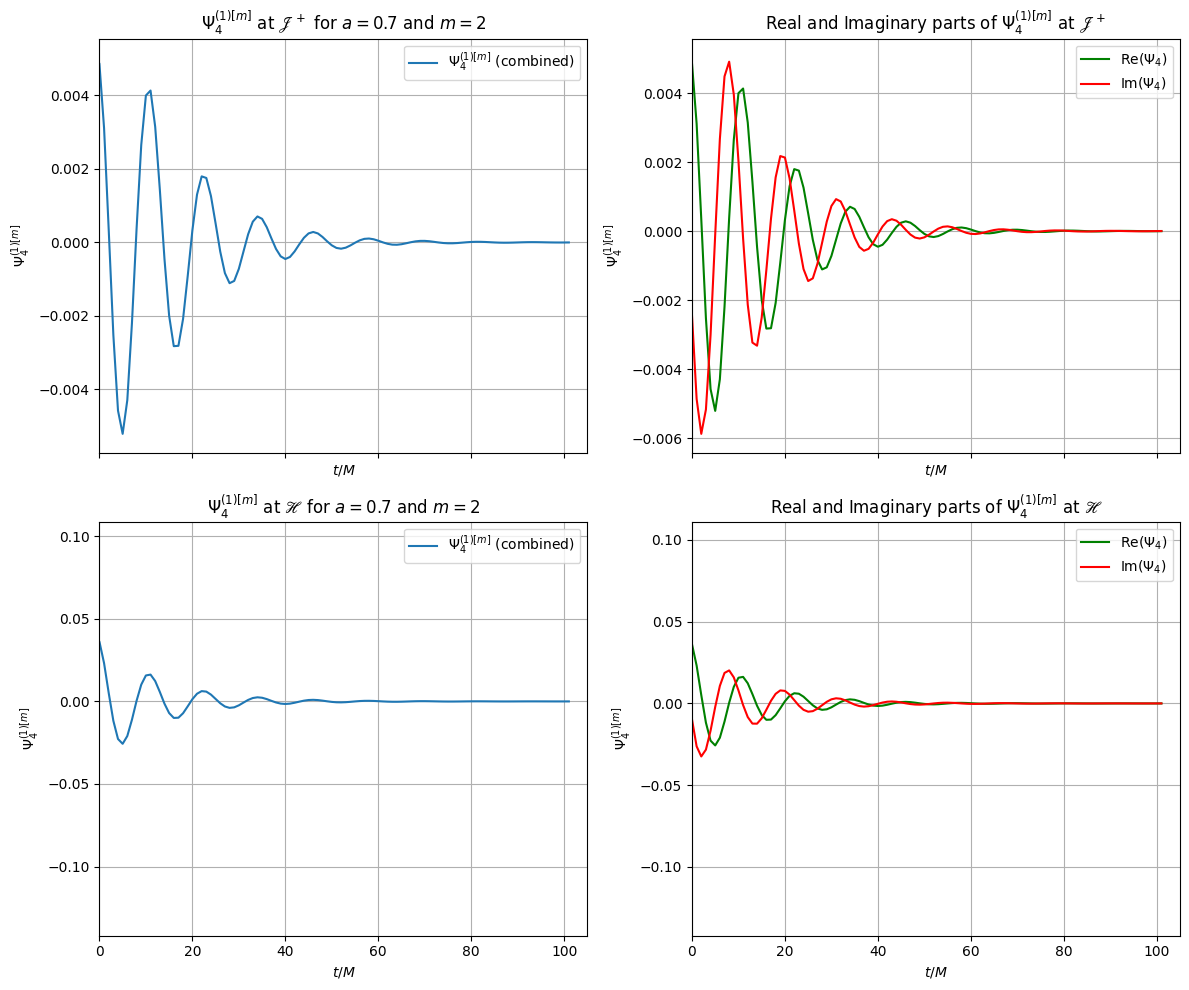

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

### --- SCRI+ ---
# 1.1 Scri+ combined
axes[0, 0].plot(psi4_lin_ts[:, 0], psi4_lin_ts[:, 1], label=r"$\Psi^{(1)[m]}_4$ (combined)")
axes[0, 0].set_xlim(0, 105)
axes[0, 0].set_title(r"$\Psi^{(1)[m]}_4$ at $\mathscr{J}^+$ for $a=0.7$ and $m=2$")
axes[0, 0].set_xlabel(r"$t/M$")
axes[0, 0].set_ylabel(r"$\Psi^{(1)[m]}_4$")
axes[0, 0].legend()
axes[0, 0].grid()

# 1.2 Scri+ separated
axes[0, 1].plot(psi4_lin_ts[:, 0], psi4_lin_ts[:, 1].real, label=r"Re($\Psi_4$)", color="g")
axes[0, 1].plot(psi4_lin_ts[:, 0], psi4_lin_ts[:, 1].imag, label=r"Im($\Psi_4$)", color="r")
axes[0, 1].set_xlim(0, 105)
axes[0, 1].set_title(r"Real and Imaginary parts of $\Psi^{(1)[m]}_4$ at $\mathscr{J}^+$")
axes[0, 1].set_xlabel(r"$t/M$")
axes[0, 1].set_ylabel(r"$\Psi^{(1)[m]}_4$")
axes[0, 1].legend()
axes[0, 1].grid()

### --- HORIZON ---
# 2.1 Horizon combined
axes[1, 0].plot(psi4_lin_ts_h[:, 0], psi4_lin_ts_h[:, 1], label=r"$\Psi^{(1)[m]}_4$ (combined)")
axes[1, 0].set_xlim(0, 105)
axes[1, 0].set_title(r"$\Psi^{(1)[m]}_4$ at $\mathscr{H}$ for $a=0.7$ and $m=2$")
axes[1, 0].set_xlabel(r"$t/M$")
axes[1, 0].set_ylabel(r"$\Psi^{(1)[m]}_4$")
axes[1, 0].legend()
axes[1, 0].grid()

# 2.2 Horizon separated
axes[1, 1].plot(psi4_lin_ts_h[:, 0], psi4_lin_ts_h[:, 1].real, label=r"Re($\Psi_4$)", color="g")
axes[1, 1].plot(psi4_lin_ts_h[:, 0], psi4_lin_ts_h[:, 1].imag, label=r"Im($\Psi_4$)", color="r")
axes[1, 1].set_xlim(0, 105)
axes[1, 1].set_title(r"Real and Imaginary parts of $\Psi^{(1)[m]}_4$ at $\mathscr{H}$")
axes[1, 1].set_xlabel(r"$t/M$")
axes[1, 1].set_ylabel(r"$\Psi^{(1)[m]}_4$")
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()

## Analysis

### Fitting the data

The models that we are actually using to fit the data are the following ones:

- **w-tau-fixed fit:** Fits amplitude and phase while keeping $\omega$ and $\tau$ fixed, using values from QNM_spectrum.  

- **w-tau fit:** Fits all parameters, including amplitude, phase, frequency $\omega$, and damping time $\tau$.  

- **w-tau-m-af fit:** Fully fits amplitude, phase, final mass $M$, and the dimensionless spin parameter $a_f$.  

### w-tau-fixed 

### Horizon

In [104]:
qnmspec=np.array([QNM_spectrum(2,2,n,1,0.7) for n in range(8)]) 
args = {'qnms': qnmspec, 'real': False}

fitres_h=rdf.fit_qnm(((psi4_lin_ts_h)),[0.1,2,0.2,1,0.2,2],t0 = 0,linear = False, model = 'w-tau-fixed',
               min_method = 'Nelder-Mead', tol=1e-8,bounds = None,**args)

fit_model_w_tau_fixed_h = rdf.rd_model_wtau_fixed(fitres_h,times = psi4_lin_ts_h[:,0],**args)

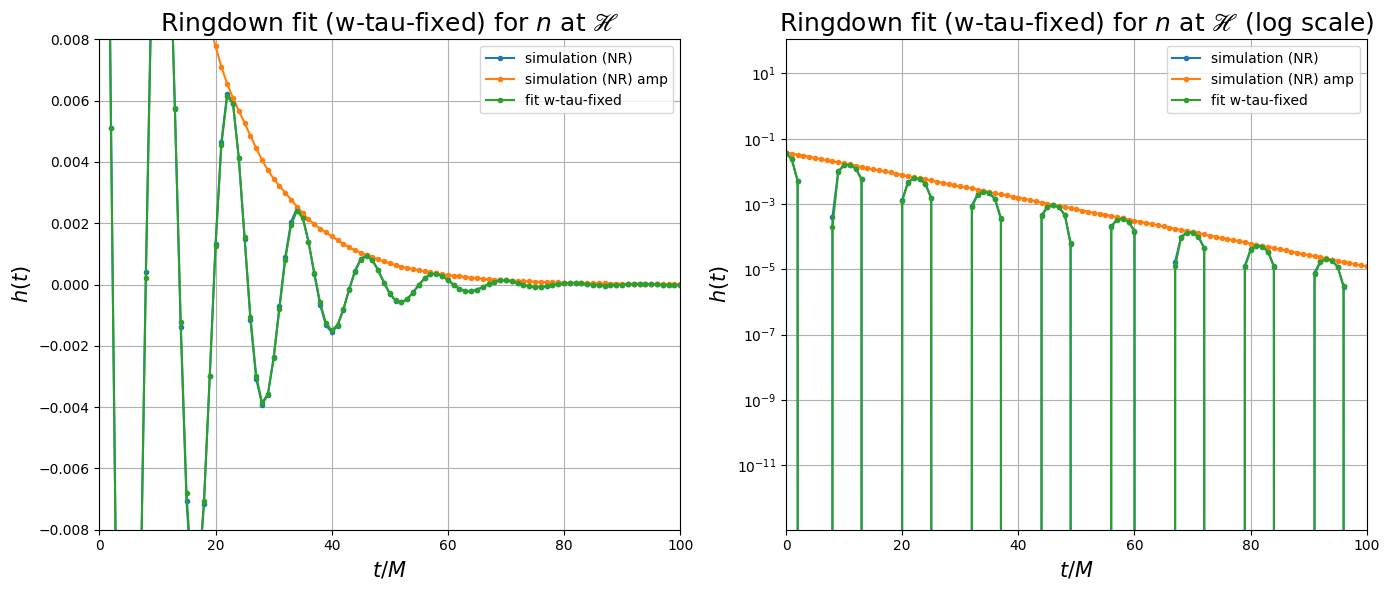

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(psi4_lin_ts_h[:,0], psi4_lin_ts_h[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[0].plot(psi4_lin_ts_h[:,0], np.abs(psi4_lin_ts_h[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[0].plot(psi4_lin_ts_h[:,0], fit_model_w_tau_fixed_h, linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')

axes[0].set_xlabel(r'$t/M$', fontsize=15)
axes[0].set_ylabel(r'$h(t)$', fontsize=15)
axes[0].set_title(r"Ringdown fit (w-tau-fixed) for $n$ at $\mathscr{H}$", fontsize=18)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(-0.008, 0.008)
axes[0].legend()
axes[0].grid()

axes[1].plot(psi4_lin_ts_h[:,0], psi4_lin_ts_h[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[1].plot(psi4_lin_ts_h[:,0], np.abs(psi4_lin_ts_h[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[1].plot(psi4_lin_ts_h[:,0], fit_model_w_tau_fixed_h, linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')

axes[1].set_yscale('log')
axes[1].set_xlabel(r'$t/M$', fontsize=15)
axes[1].set_ylabel(r'$h(t)$', fontsize=15)
axes[1].set_title(r"Ringdown fit (w-tau-fixed) for $n$ at $\mathscr{H}$ (log scale)", fontsize=18)
axes[1].set_xlim(0, 100)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

In [106]:
fitres_h

array([ 0.03848087,  0.00826388, -0.00640499, -0.51623326,  0.58343393,
        5.38116035])

### Null infinity

In [107]:
qnmspec=np.array([QNM_spectrum(2,2,n,1,0.7) for n in range(8)]) 
args = {'qnms': qnmspec, 'real': False}

fitres=rdf.fit_qnm(((psi4_lin_ts)),[0.1,2,0.2,1,0.2,2],t0 = 0,linear = False, model = 'w-tau-fixed',
               min_method = 'Nelder-Mead', tol=1e-8,bounds = None,**args)

fit_model_w_tau_fixed = rdf.rd_model_wtau_fixed(fitres,times = psi4_lin_ts[:,0],**args)

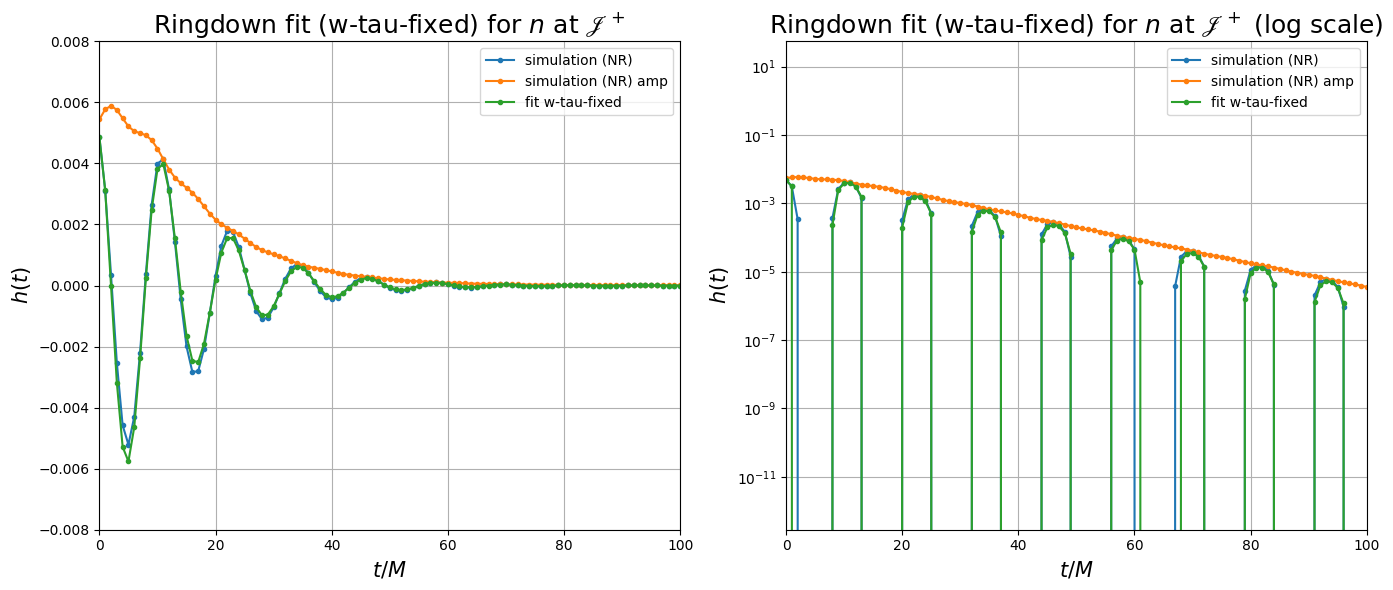

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(psi4_lin_ts[:,0], psi4_lin_ts[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[0].plot(psi4_lin_ts[:,0], np.abs(psi4_lin_ts[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[0].plot(psi4_lin_ts[:,0], fit_model_w_tau_fixed, linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')

axes[0].set_xlabel(r'$t/M$', fontsize=15)
axes[0].set_ylabel(r'$h(t)$', fontsize=15)
axes[0].set_title(r"Ringdown fit (w-tau-fixed) for $n$ at $\mathscr{J}^+$", fontsize=18)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(-0.008, 0.008)
axes[0].legend()
axes[0].grid()

axes[1].plot(psi4_lin_ts[:,0], psi4_lin_ts[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[1].plot(psi4_lin_ts[:,0], np.abs(psi4_lin_ts[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[1].plot(psi4_lin_ts[:,0], fit_model_w_tau_fixed, linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')

axes[1].set_yscale('log')
axes[1].set_xlabel(r'$t/M$', fontsize=15)
axes[1].set_ylabel(r'$h(t)$', fontsize=15)
axes[1].set_title(r"Ringdown fit (w-tau-fixed) for $n$ at $\mathscr{J}^+$ (log scale)", fontsize=18)
axes[1].set_xlim(0, 100)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

In [109]:
fitres

array([ 1.00694765e-02, -3.49528625e-03, -4.21457429e-03, -4.30194898e-01,
        5.09492359e-01,  5.01300619e+00])

### w-tau 

### Horizon

In [146]:
# the fit doesn't seem to be very good, so let's try with "perfect" initial parameters
A_init = np.max(np.abs(psi4_lin_ts[:,1]))  # initial amplitude
omega_init = qnmspec[0,0][0]  # frequency from qnm
phi_init = np.pi / 4  # good (?) phase
tau_init = qnmspec[0,1][0]  # damping time also from qnm

fitres2_h = rdf.fit_qnm(((psi4_lin_ts)), [0.1,2,0.5,10], 
                         t0=10, linear=False, model='w-tau',
                         min_method='Nelder-Mead', tol=1e-8, bounds=None, **args)

fit_model_w_tau_h = rdf.rd_model_wtau(fitres2_h,times = psi4_lin_ts_h[:,0],**args)

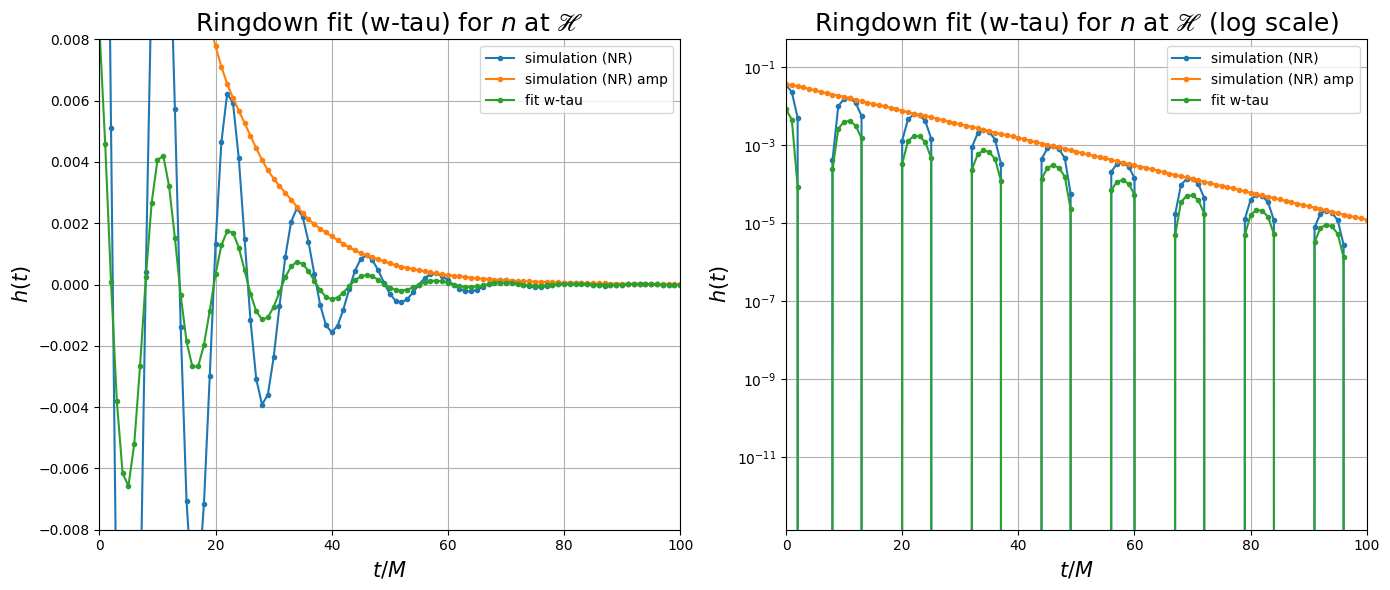

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(psi4_lin_ts_h[:,0], psi4_lin_ts_h[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[0].plot(psi4_lin_ts_h[:,0], np.abs(psi4_lin_ts_h[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[0].plot(psi4_lin_ts_h[:,0], fit_model_w_tau_h, linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[0].set_xlabel(r'$t/M$', fontsize=15)
axes[0].set_ylabel(r'$h(t)$', fontsize=15)
axes[0].set_title(r"Ringdown fit (w-tau) for $n$ at $\mathscr{H}$", fontsize=18)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(-0.008, 0.008)
axes[0].legend()
axes[0].grid()

axes[1].plot(psi4_lin_ts_h[:,0], psi4_lin_ts_h[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[1].plot(psi4_lin_ts_h[:,0], np.abs(psi4_lin_ts_h[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[1].plot(psi4_lin_ts_h[:,0], fit_model_w_tau_h, linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[1].set_yscale('log')
axes[1].set_xlabel(r'$t/M$', fontsize=15)
axes[1].set_ylabel(r'$h(t)$', fontsize=15)
axes[1].set_title(r"Ringdown fit (w-tau) for $n$ at $\mathscr{H}$ (log scale)", fontsize=18)
axes[1].set_xlim(0, 100)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

In [143]:
fitres2_h

array([ 9.53181727e-03, -4.94286328e-01,  5.32977612e-01,  1.34584360e+01])

### comparison between fitted damping times and frequencies with their theoretical values

In [136]:
fitres2_h[2]/qnmspec[0,0][0],fitres2_h[3]/qnmspec[0,1][0]

(1.0007085392667034, 1.0873457111433507)

### Null infinity

In [137]:
qnmspec=np.array([QNM_spectrum(2,2,n,1,0.7) for n in range(8)]) 
args = {'qnms': qnmspec, 'real': False}

fitres2=rdf.fit_qnm(((psi4_lin_ts)),[0.1,2,0.5,10],t0 = 10,linear = False, model = 'w-tau',
               min_method = 'Nelder-Mead', tol=1e-8,bounds = None,**args)

fit_model_w_tau = rdf.rd_model_wtau(fitres2,times = psi4_lin_ts[:,0],**args)

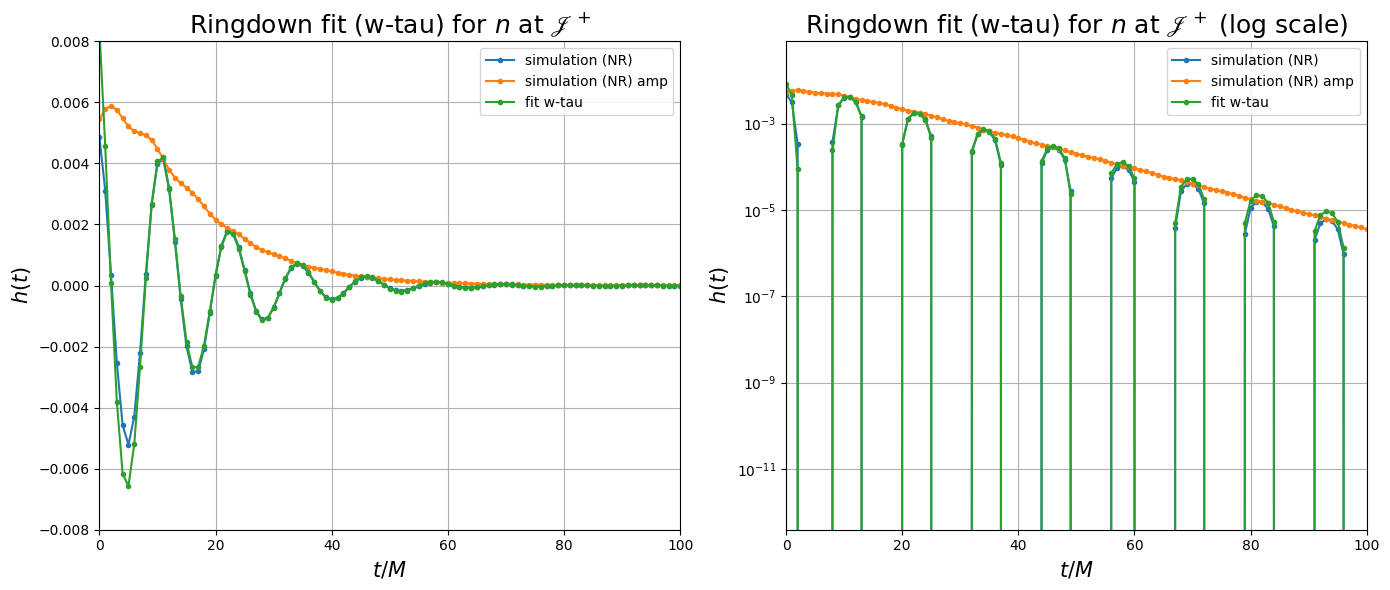

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(psi4_lin_ts[:,0], psi4_lin_ts[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[0].plot(psi4_lin_ts[:,0], np.abs(psi4_lin_ts[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[0].plot(psi4_lin_ts[:,0], fit_model_w_tau, linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[0].set_xlabel(r'$t/M$', fontsize=15)
axes[0].set_ylabel(r'$h(t)$', fontsize=15)
axes[0].set_title(r"Ringdown fit (w-tau) for $n$ at $\mathscr{J}^+$", fontsize=18)
axes[0].set_xlim(0, 100)
axes[0].set_ylim(-0.008, 0.008)
axes[0].legend()
axes[0].grid()

axes[1].plot(psi4_lin_ts[:,0], psi4_lin_ts[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[1].plot(psi4_lin_ts[:,0], np.abs(psi4_lin_ts[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[1].plot(psi4_lin_ts[:,0], fit_model_w_tau, linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[1].set_yscale('log')
axes[1].set_xlabel(r'$t/M$', fontsize=15)
axes[1].set_ylabel(r'$h(t)$', fontsize=15)
axes[1].set_title(r"Ringdown fit (w-tau) for $n$ at $\mathscr{J}^+$ (log scale)", fontsize=18)
axes[1].set_xlim(0, 100)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

In [139]:
fitres2

array([ 9.53184207e-03, -4.94287098e-01,  5.32977438e-01,  1.34583793e+01])

In [140]:
fitres2[2]/qnmspec[0,0][0],fitres2[3]/qnmspec[0,1][0]

(1.0007082124121145, 1.087341128742073)

### w-tau-m-af (work in progress)

In [22]:
#qnmspec=np.array([QNM_spectrum(2,2,n,1,0.7) for n in range(8)]) 
#args = {'qnms': qnmspec, 'real': False}

#fitres=rdf.fit_qnm(((psi4_lin_ts)),[0.1,2,0.5,0.4],t0 = 0,linear = False, model = 'w-tau-m-af',
#               min_method = 'Nelder-Mead', tol=1e-8,bounds = None,**args)

#fit_model_w_tau_m_af = rdf.rd_model_wtau_m_af(fitres,times = psi4_lin_ts[:,0],**args)

### Final results

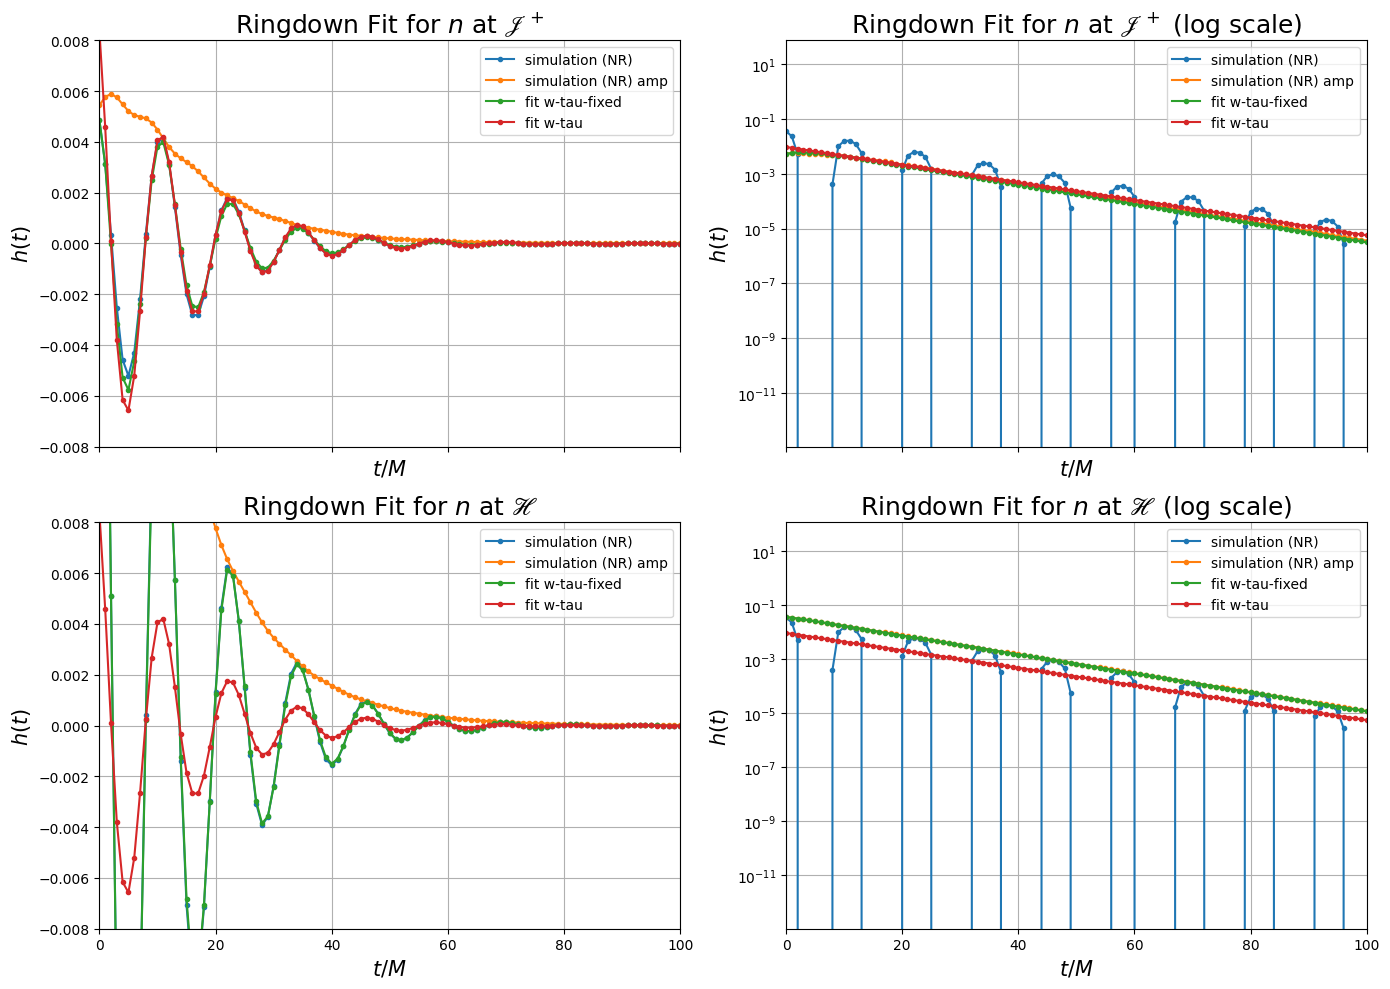

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

### ---SCRI+ ---
# 1.1 linear
axes[0, 0].plot(psi4_lin_ts[:,0], psi4_lin_ts[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[0, 0].plot(psi4_lin_ts[:,0], np.abs(psi4_lin_ts[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[0, 0].plot(psi4_lin_ts[:,0], fit_model_w_tau_fixed, linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')
axes[0, 0].plot(psi4_lin_ts[:,0], fit_model_w_tau, linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[0, 0].set_xlabel('$t/M$', fontsize=15)
axes[0, 0].set_ylabel('$h(t)$', fontsize=15)
axes[0, 0].set_title(r"Ringdown Fit for $n$ at $\mathscr{J}^+$", fontsize=18)
axes[0, 0].set_xlim(0, 100)
axes[0, 0].set_ylim(-0.008, 0.008)
axes[0, 0].legend()
axes[0, 0].grid()

# 1.2 log
axes[0, 1].plot(psi4_lin_ts[:,0], psi4_lin_ts_h[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[0, 1].plot(psi4_lin_ts[:,0], np.abs(psi4_lin_ts[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[0, 1].plot(psi4_lin_ts[:,0], np.abs(fit_model_w_tau_fixed), linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')
axes[0, 1].plot(psi4_lin_ts[:,0], np.abs(fit_model_w_tau), linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('$t/M$', fontsize=15)
axes[0, 1].set_ylabel('$h(t)$', fontsize=15)
axes[0, 1].set_title(r"Ringdown Fit for $n$ at $\mathscr{J}^+$ (log scale)", fontsize=18)
axes[0, 1].set_xlim(0, 100)
axes[0, 1].legend()
axes[0, 1].grid()

### ---HORIZON ---
# 2.1 linear
axes[1, 0].plot(psi4_lin_ts_h[:,0], psi4_lin_ts_h[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[1, 0].plot(psi4_lin_ts_h[:,0], np.abs(psi4_lin_ts_h[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[1, 0].plot(psi4_lin_ts_h[:,0], fit_model_w_tau_fixed_h, linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')
axes[1, 0].plot(psi4_lin_ts_h[:,0], fit_model_w_tau_h, linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[1, 0].set_xlabel('$t/M$', fontsize=15)
axes[1, 0].set_ylabel('$h(t)$', fontsize=15)
axes[1, 0].set_title(r"Ringdown Fit for $n$ at $\mathscr{H}$", fontsize=18)
axes[1, 0].set_xlim(0, 100)
axes[1, 0].set_ylim(-0.008, 0.008)
axes[1, 0].legend()
axes[1, 0].grid()

# 2.2 log
axes[1, 1].plot(psi4_lin_ts_h[:,0], psi4_lin_ts_h[:,1], linestyle='-', marker='o', markersize=3, label='simulation (NR)')
axes[1, 1].plot(psi4_lin_ts_h[:,0], np.abs(psi4_lin_ts_h[:,1]), linestyle='-', marker='o', markersize=3, label='simulation (NR) amp')
axes[1, 1].plot(psi4_lin_ts_h[:,0], np.abs(fit_model_w_tau_fixed_h), linestyle='-', marker='o', markersize=3, label='fit w-tau-fixed')
axes[1, 1].plot(psi4_lin_ts_h[:,0], np.abs(fit_model_w_tau_h), linestyle='-', marker='o', markersize=3, label='fit w-tau')

axes[1, 1].set_yscale('log')
axes[1, 1].set_xlabel('$t/M$', fontsize=15)
axes[1, 1].set_ylabel('$h(t)$', fontsize=15)
axes[1, 1].set_title(r"Ringdown Fit for $n$ at $\mathscr{H}$ (log scale)", fontsize=18)
axes[1, 1].set_xlim(0, 100)
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()